In [16]:
import pandas as pd

# Load the diabetes dataset
diabetes_data = pd.read_csv('diabetes.csv')


In [17]:
# Display the first few rows of the dataset to understand its structure
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
# Check for missing values in the diabetes dataset
diabetes_missing_values = diabetes_data.isnull().sum()

diabetes_missing_values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Columns where a value of 0 might not make logical sense and might represent missing data
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count the number of zero values in these columns
zero_counts = diabetes_data[columns_to_check].apply(lambda col: (col == 0).sum())

zero_counts


Glucose           1
BloodPressure     6
SkinThickness    37
Insulin          60
BMI               4
dtype: int64

In [20]:
import numpy as np

# Replace zeros with NaN in the specified columns
diabetes_data[columns_to_check] = diabetes_data[columns_to_check].replace(0, np.nan)

# Check the number of NaN values in these columns after the replacement
nan_counts = diabetes_data[columns_to_check].isnull().sum()

nan_counts


Glucose           1
BloodPressure     6
SkinThickness    37
Insulin          60
BMI               4
dtype: int64

In [21]:
# Impute NaN values with the median of each column
for column in columns_to_check:
    median_value = diabetes_data[column].median()
    diabetes_data[column].fillna(median_value, inplace=True)

# Check again for any NaN values after imputation
nan_counts_after_imputation = diabetes_data[columns_to_check].isnull().sum()

nan_counts_after_imputation


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

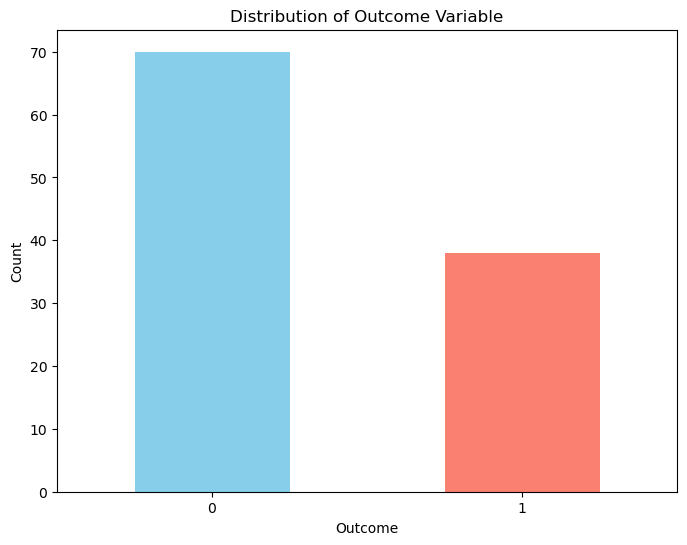

In [23]:
import matplotlib.pyplot as plt

# Check the distribution of the target variable 'Outcome'
outcome_counts = diabetes_data['Outcome'].value_counts()

# Plotting the distribution
plt.figure(figsize=(8, 6))
outcome_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Outcome Variable')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


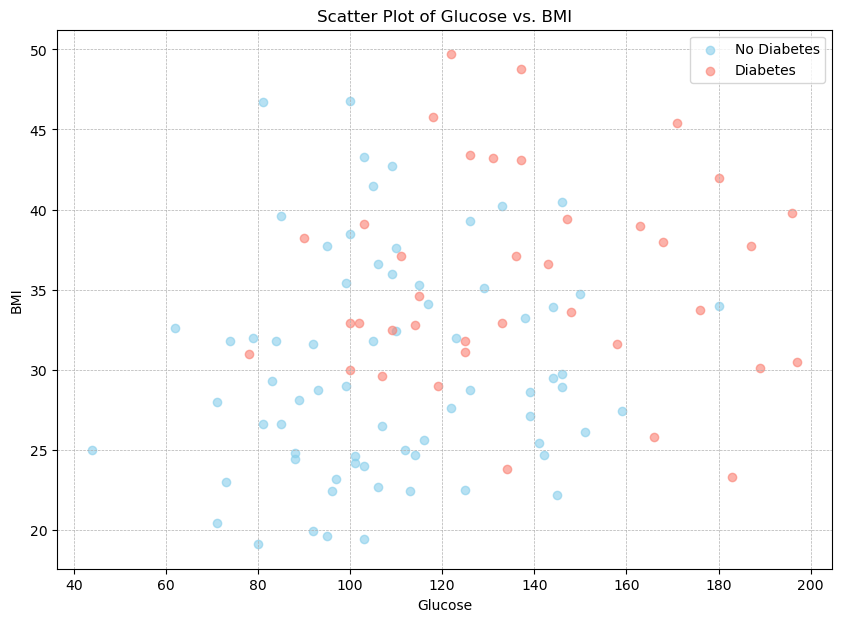

In [25]:
# Scatter plot of Glucose vs. BMI, colored by Outcome
plt.figure(figsize=(10, 7))
plt.scatter(diabetes_data[diabetes_data['Outcome'] == 0]['Glucose'], 
            diabetes_data[diabetes_data['Outcome'] == 0]['BMI'], 
            color='skyblue', label='No Diabetes', alpha=0.6)
plt.scatter(diabetes_data[diabetes_data['Outcome'] == 1]['Glucose'], 
            diabetes_data[diabetes_data['Outcome'] == 1]['BMI'], 
            color='salmon', label='Diabetes', alpha=0.6)

plt.title('Scatter Plot of Glucose vs. BMI')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into features and target
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # Displaying the first 5 rows of the scaled training data for inspection


array([[ 7.31536159e-01, -1.75132322e-01, -5.13480817e-01,
        -3.86574507e-03, -1.63048073e-01,  1.30909232e-01,
        -6.54887758e-01,  7.98825096e-01],
       [ 7.31536159e-01,  9.19637565e-01,  2.62606182e-01,
        -3.86574507e-03, -1.63048073e-01,  1.04937747e+00,
        -6.58274226e-01,  8.90914853e-01],
       [ 7.31536159e-01,  2.54520497e+00,  1.34912798e+00,
        -3.86574507e-03, -1.63048073e-01,  1.10504221e+00,
        -1.29945860e-03,  7.06735340e-01],
       [-3.72185063e-01,  1.28456086e+00,  2.62606182e-01,
         7.71860433e-01,  9.87262009e-01, -3.60849923e-02,
         1.35328769e+00, -4.90431493e-01],
       [-6.48115369e-01, -1.60165066e+00, -2.03046017e-01,
        -2.25501796e-01, -1.63048073e-01, -5.37067665e-01,
         4.55873704e-01, -1.04297003e+00]])

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with k=2
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Train the model using the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = knn_classifier.predict(X_test_scaled)

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.6818181818181818